# Useful methods
## matplotlib
    plt.rcParams["figure.figsize"] = [10.00, 5.50]
    plt.rcParams["figure.autolayout"] = True
## os
    os.walk()
    os.path.join()

# Tasks
    1.Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
    2.Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
    3.Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
    4.Визуализируйте продажи по дням.
    5.Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

# Data
    data.zip


In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

import os

### Task 1

In [2]:
os.listdir('data')

['2020-12-07',
 '2020-12-04',
 '2020-12-03',
 '2020-12-09',
 '2020-12-08',
 '2020-12-05',
 '2020-12-06']

In [3]:
def get_from_path(path_to_dir):
    """Функция, собирающая пути до csv.
    Сканирует path_to_dir и ее поддиректории на наличие csv-файлов.

    Принимаемые параметры: path_to_dir - путь начала сканирования.
    Возвращаемое значение: список (возможно пустой). 
    """
    all_csv = [ ]

    for root, dirs, files in os.walk('.', topdown=False):  # сканирование дно-верх
        for name in files:
            if '.csv' in name:
                all_csv.append(os.path.join(root, name))

    return all_csv

Кажется, из списка списков можно сделать датафрейм.

In [4]:
path_to_csv = get_from_path('./data')

In [5]:
path_to_csv

['./data/2020-12-07/Alexey_Ivanov/data.csv',
 './data/2020-12-07/Anton_Ivanov/data.csv',
 './data/2020-12-07/Petr_Smirnov/data.csv',
 './data/2020-12-07/Alexey_Fedorov/data.csv',
 './data/2020-12-07/Petr_Fedorov/data.csv',
 './data/2020-12-07/Vasiliy_Ivanov/data.csv',
 './data/2020-12-07/Alexey_Smirnov/data.csv',
 './data/2020-12-07/Kirill_Fedorov/data.csv',
 './data/2020-12-07/Rostislav_Fedorov/data.csv',
 './data/2020-12-07/Anton_Smirnov/data.csv',
 './data/2020-12-04/Petr_Smirnov/data.csv',
 './data/2020-12-04/Petr_Fedorov/data.csv',
 './data/2020-12-04/Vasiliy_Ivanov/data.csv',
 './data/2020-12-04/Rostislav_Ivanov/data.csv',
 './data/2020-12-04/Alexey_Smirnov/data.csv',
 './data/2020-12-04/Rostislav_Smirnov/data.csv',
 './data/2020-12-04/Kirill_Fedorov/data.csv',
 './data/2020-12-04/Rostislav_Fedorov/data.csv',
 './data/2020-12-04/Petr_Ivanov/data.csv',
 './data/2020-12-03/Petr_Fedorov/data.csv',
 './data/2020-12-03/Vasiliy_Ivanov/data.csv',
 './data/2020-12-03/Alexey_Smirnov/data.

Это можно распарсить и достать отсюда дату и имя.

In [6]:
def make_df(path_to_file):
    """Функция, которая собирает датафрейм из csv и пути до csv.

    Принимаемые параметры: путь до csv (строка).
    Возвращаемое значение: датафрейм.
    """
    df = pd.read_csv(path_to_file)
    date, name = path_to_file.split('/')[2], path_to_file.split('/')[3]
    df['name'], df['date'] = name, date
    df.date = pd.to_datetime(df.date)
    df = df.drop(columns='Unnamed: 0')
    return df

In [7]:
dfs = []

for path in path_to_csv:
    dfs.append(make_df(path))

In [8]:
big_df = pd.concat(dfs).sort_values('name')

In [9]:
big_df.head()

,product_id,quantity,name,date
3,15,1,Alexey_Fedorov,2020-12-07
0,73,5,Alexey_Fedorov,2020-12-08
1,34,1,Alexey_Fedorov,2020-12-08
2,71,1,Alexey_Fedorov,2020-12-08
3,18,2,Alexey_Fedorov,2020-12-08


In [10]:
big_df.dtypes

product_id             int64
quantity               int64
name                  object
date          datetime64[ns]
dtype: object

In [11]:
big_df.quantity.sum()

480

### Task 2

In [12]:
big_df.groupby('name', as_index=False) \
    .agg({'quantity' : 'sum'}) \
    .sort_values(['quantity', 'name'], ascending=[False, True]) \
    .head()
    

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


### Task 3

In [13]:
big_df.head()

,product_id,quantity,name,date
3,15,1,Alexey_Fedorov,2020-12-07
0,73,5,Alexey_Fedorov,2020-12-08
1,34,1,Alexey_Fedorov,2020-12-08
2,71,1,Alexey_Fedorov,2020-12-08
3,18,2,Alexey_Fedorov,2020-12-08


In [14]:
temp_df = big_df.groupby('product_id', as_index=False) \
    .agg({'quantity' : 'sum'}) \
    .rename(columns={'quantity' : 'count'})

In [15]:
temp_df

,product_id,count
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10
...,...,...
66,94,13
67,95,3
68,96,5
69,97,3


<AxesSubplot: xlabel='product_id', ylabel='count'>

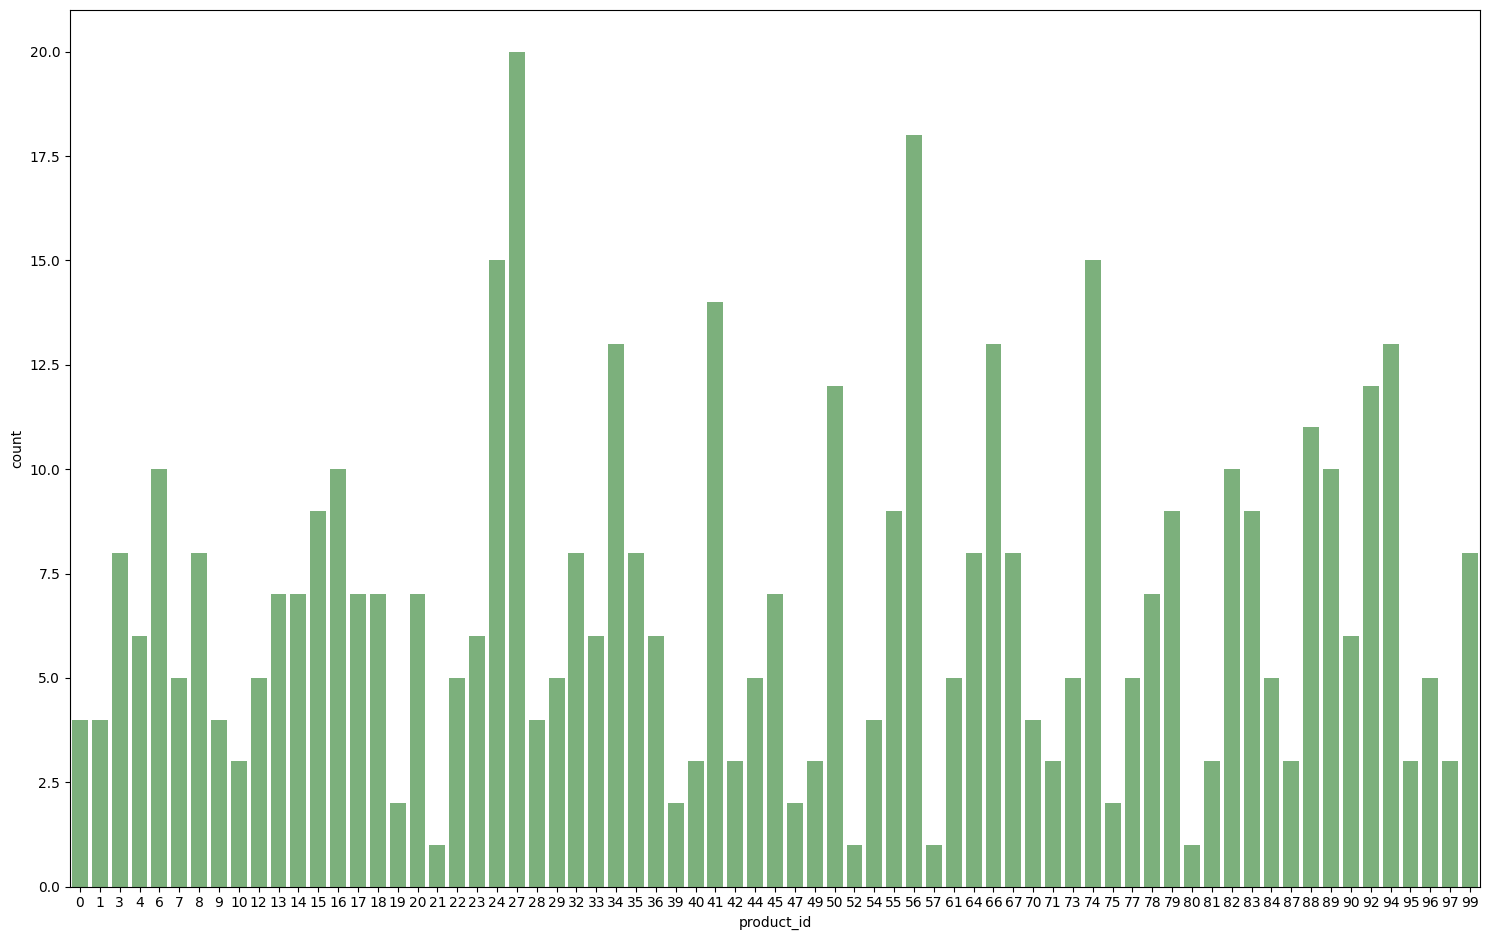

In [16]:
plt.rcParams["figure.figsize"] = [15.00, 9.50]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x=temp_df['product_id'], y=temp_df['count'], color='green', alpha=0.55)

### Task 4

In [17]:
# уникальные месяцы и дни
big_df.date.dt.month.unique(), big_df.date.dt.day.unique()


(array([12]), array([7, 8, 5, 3, 4, 9, 6]))

In [18]:
big_df['day'] = big_df.date.dt.day

In [19]:
temp_df = big_df.groupby('day', as_index=False) \
    .agg({'quantity' : 'sum'})

<AxesSubplot: xlabel='day', ylabel='quantity'>

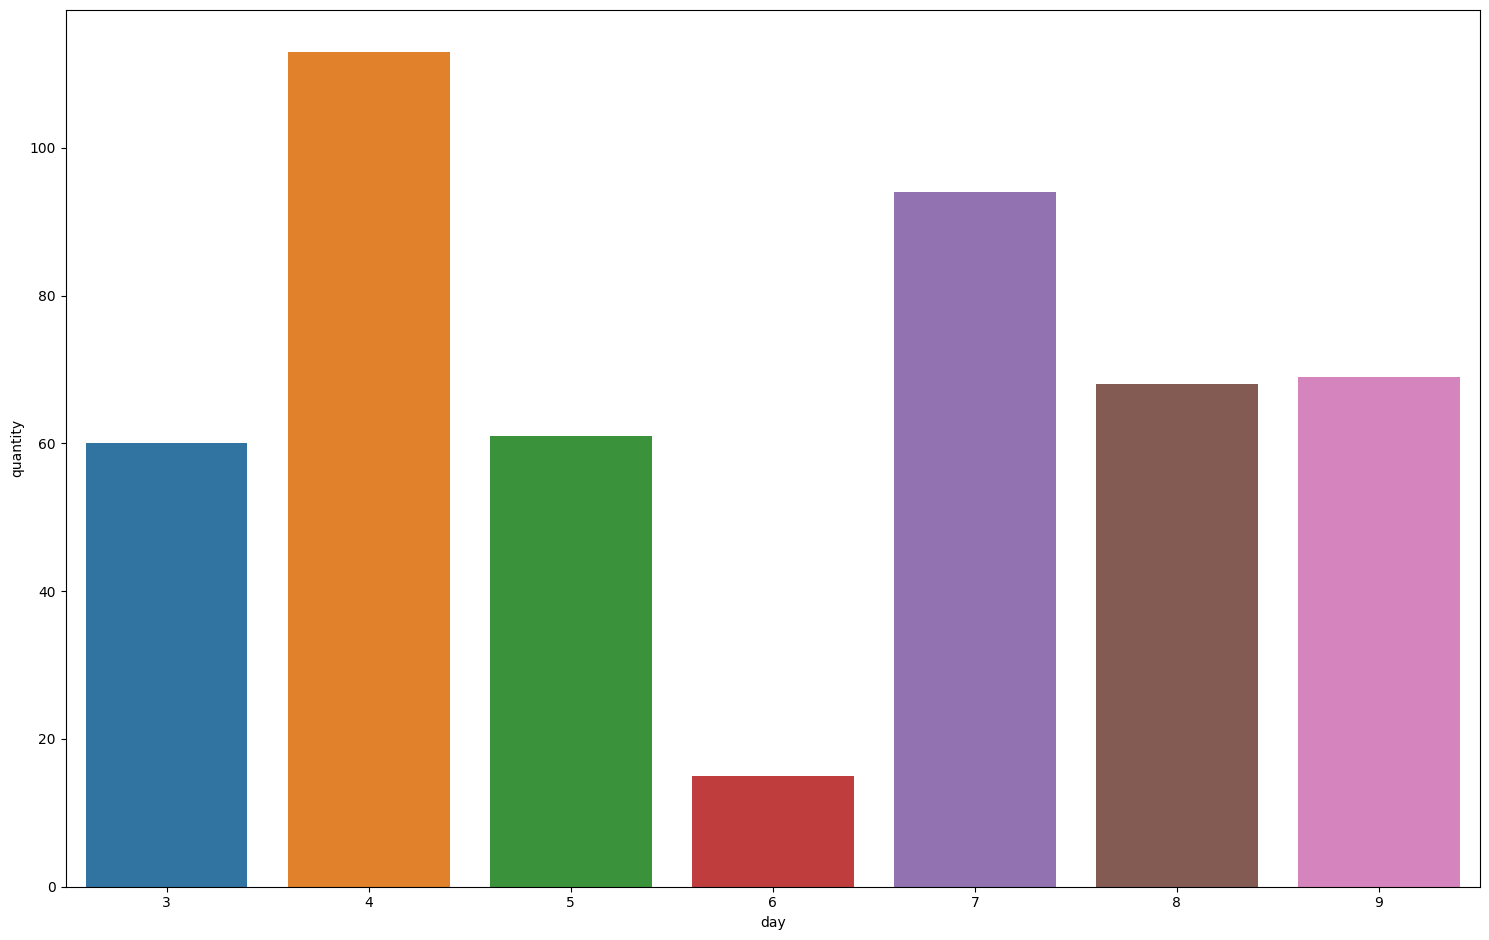

In [20]:
sns.barplot(x=temp_df.day, y=temp_df.quantity)

### Task 5

In [21]:
big_df.head()

,product_id,quantity,name,date,day
3,15,1,Alexey_Fedorov,2020-12-07,7
0,73,5,Alexey_Fedorov,2020-12-08,8
1,34,1,Alexey_Fedorov,2020-12-08,8
2,71,1,Alexey_Fedorov,2020-12-08,8
3,18,2,Alexey_Fedorov,2020-12-08,8


In [22]:
# неверный вариант
big_df.groupby(['product_id', 'name'], as_index=False) \
    .agg({'date' : 'count'}) \
    .query('date > 1')

,product_id,name,date
24,15,Anton_Ivanov,2
91,55,Alexey_Smirnov,2
150,94,Petr_Fedorov,2


In [23]:
big_df.query('product_id == 55')

,product_id,quantity,name,date,day
2,55,5,Alexey_Smirnov,2020-12-09,9
1,55,1,Alexey_Smirnov,2020-12-09,9
0,55,3,Petr_Smirnov,2020-12-05,5


In [24]:
# верный вариант
# оставим лишь одну покупку товара в день на человека
big_df.drop_duplicates(['product_id', 'name', 'date']) \
    .groupby(['product_id', 'name'], as_index=False) \
    .agg({'date' : 'count'}) \
    .query('date > 1') \
    .rename(columns={'date' : 'count'})

,product_id,name,count
24,15,Anton_Ivanov,2
150,94,Petr_Fedorov,2
